# Kapitel 2 
# Lineare Algebra kombiniert mit der Wahrscheinlichkeitstheorie über den Komplexen Zahlen

## 2.1 Das Klassiche Bit - Cbit
Das Wort Bit ist eine Wortkreuzung aus binary digit – englisch für „binäre Ziffer“. Die kleinstmögliche Unterscheidung, die ein digitaltechnisches System treffen kann, ist die zwischen zwei Möglichkeiten, in der Informatik auch als Zustände bezeichnet. 
Zum Beispiel kann ein Lichtschalter Ein oder Aus sein was ein Bit und somit ein Zustand repräsentiert. Somit sind mit $n$ Bits $2^n$ Zustände möglich. 

In der digitalen Schaltungstechnik werden Transistoren zum Steuern elektrischer Spannungen und Ströme verwendet. Liegt die Spannung im hohen Bereich, so liegt der Zustand $H$ (high) vor, im unteren Bereich $L$ (low).
Dabei entspricht der Zustand eines Bits als
- boolesche Variablen mit $falsch$ bzw. $wahr$
- Binärstelle einer numerischen Variablen mit $0$ bzw. $1$

Somit können z.B. mit $H\to 1$ und $L\to 0$ eine Zuordnung definiert werden und fertig ist der klassische Computer.

Analog zum klassichen Bit gibt es in der Quanteninformation ebenfalls eine kleinste Einheit, das Qubit. Als Zweizustands-Quantensystem ist das Qubit das einfachste nichttriviale Quantensystem überhaupt. __Der Begriff „Zweizustandssystem“ bezieht sich hierbei nicht etwa auf die Zahl der Zustände, die das System annehmen kann, denn jedes nichttriviale quantenmechanische System kann prinzipiell unendlich viele verschiedene Zustände annehmen.__ 

Bevor wir uns mit den Qubits und deren seltsamen Notationen befassen, möchte ich mit etwas Vertrauterem beginnen, nähmlich mit dem klassische Bit - das Cbit. Wir werden das Cbit nun von einer Perspektive aus beschreiben, die der Qubits sehr ähnlich ist. Ich hoffe, indem die Qubits und die damit verbundene, bis dato nicht verstandene Quantenphysik in einem klassischen Kontext mit Cbits dargestellt werden, die Grundlagen eines Quantencomputer verdaulicher zu erläutern.

Die Diraknotation spielt bei den Qubits eine wichtige Rolle. Um mit ihr vertrauter zu werden, können die Cbits in "Kästchen" mit den Symbolen $|$ für Bra und $\rangle$ für Ket gepackt werden. Hat man die Gleichungen mit den Cbits verstanden, so werden die Qubits keine grossen Schwierigkeiten mehr bereiten. 

Ein Cbits hat bekanntlich die Zustände $0$ und $1$. In einem zweidimensionalen Vektorraum wird ein Cbit definieren mit:

$$|0\rangle = |0\rangle_{1} = \left(\begin{array}{cc} 1\\ 0 \end{array}\right), \,\,\,\,\,\,\,\, |1\rangle = |1\rangle_{1} = \left(\begin{array}{cc} 0\\ 1\end{array}\right) \,\,\,\,\,\,\,\,(2.1)$$ 

<img src="src_picture\vecB2.png" alt="drawing" width="500"/>

Die $1$ nach dem Ket repräsentiert dabei die Anzahl Cbits. 
Bra und Ket können als Vektoren gesehen werden, die multipliziert zu einem BraKet oder einem KetBra werden:

$$\langle 0|0 \rangle = \left(\begin{array}{cc} 1 & 0\end{array}\right)* \left(\begin{array}{cc} 1\\ 0\end{array}\right) = 1$$

$$|0 \rangle \langle 0|= \left(\begin{array}{cc} 1\\ 0\end{array}\right) * \left(\begin{array}{cc} 1 & 0\end{array}\right) = \left(\begin{array}{cc} 1 & 0\\ 0 & 0\end{array}\right) \,\,\,\,\,\,\,\,(2.2)$$

Wir wissen, dass es mit drei Cbits acht mögliche Zustände gibt, welche wir nun unterschiedlich darstellen können: 

$$ 0=|0\rangle_{3} = |000\rangle, 1=|1\rangle_{3} = |001\rangle, 2 =|2\rangle_{3}= |010\rangle, 3 =|3\rangle_{3}= |011\rangle, 4 =|4\rangle_{3}= |100\rangle, 5 =|5\rangle_{3}= |101\rangle, 6=|6\rangle_{3} = |110\rangle, 7=|7\rangle_{3} =|111\rangle \,\,\,\,\,\,\,\,(2.3)$$ 

was eine verkürtze Form des Tensorproduktes ist:

$$|0\rangle*|0\rangle*|0\rangle, \,\,|0\rangle*|0\rangle*|1\rangle, \,\,|0\rangle*|1\rangle*|0\rangle, \,\,|0\rangle*|1\rangle*|1\rangle, \,\,|1\rangle*|0\rangle*|0\rangle, \,\,|1\rangle*|0\rangle*|1\rangle, \,\,|1\rangle*|1\rangle*|0\rangle, \,\,|1\rangle*|1\rangle*|1\rangle\,\,\,\,\,\,\,\,(2.4)$$ 

Die Quantenmechanik verlangt, dass jede Überlagerung von Zuständen eines Objekts auch wieder ein möglicher Zustand des Objekts ist. Deshalb muss das mathematische Modell außer den genannten Produkten auch beliebige Linearkombinationen enthalten, die dann insgesamt den Hilbertraum des Systems bilden.

In userem Beispiel mit drei Cbits wäre der Vektorraum achtdimensional mit einer orthonormalen Basis.
Wir erstellen das Tensorprodukt der Cbits in der Form

$$\left(\begin{array}{cc} x_{0}\\ x_{1}\end{array}\right) \bigotimes
\left(\begin{array}{cc} y_{0}\\ y_{1}\end{array}\right) \bigotimes 
\left(\begin{array}{cc} z_{0}\\ z_{1}\end{array}\right) 
= \left(\begin{array}{ccc}  x_{0}y_{0}z_{0}\\ x_{0}y_{0}z_{1}\\x_{0}y_{1}z_{0}\\x_{0}y_{1}z_{1}\\x_{1}y_{0}z_{0}\\x_{1}y_{0}z_{1}\\x_{1}y_{1}z_{0}\\x_{1}y_{1}z_{1}\\\end{array}\right)\,\,\,\,\,\,\,\,(2.5)$$

und erhalten zum Beispiel für $5_{d} = 101_{b} = |101\rangle = |1\rangle \bigotimes|0\rangle \bigotimes|1\rangle=$

$$\left(\begin{array}{cc} 0\\ 1\end{array}\right) \bigotimes
\left(\begin{array}{cc} 1\\ 0\end{array}\right) \bigotimes 
\left(\begin{array}{cc} 0\\ 1\end{array}\right) 
= \left(\begin{array}{c}  0\\ 0\\0\\0\\0\\1\\0\\0\end{array}\right)\,\,\,\,\,\,\,\,(2.6)$$

Wenn wir nun diesen Vektor indexieren mit $0$ bis $n$, dann können wir dort wo der Index $true = 1$ ist den Wert ablesen, also $5$, die wir mit Linearkombinationen aus den gegeben Objekten gebildet haben.

Sprich, man kann jeden Integer $x$ als Vektor mit $0<=x<=N$ als Linearkombination von $N$ orthonormalen Vektoren in einem $N$-dimensionalen Raum darstellen. Dazu nimmt man einen $N\times1$-Vektor $= |x\rangle $ der aus lauter $0$ besteht, ausser an der Position $x$. Aus dem Tensorprodukt folgt mit $N=2^n$:

$$x = \sum_{i=0}^{n-1} x_{i}2^{i} $$

$$|x\rangle_n = |x_{0}\rangle \bigotimes |x_{1}\rangle \bigotimes ... \bigotimes |x_{n-2}\rangle \bigotimes |x_{n-1}\rangle \,\,\,\,\,\,\,\,(2.7)$$

## 2.3 Reversible Operationen auf Cbits
Quantencomputer brauchen fast ausschliesslich reversible Operationen um die Rechnungen auszuführen. Es gibt nur eine einzige irreversible Operation die gebraucht wird: die Messung. Sie wird gebraucht um den Zustand der Qubits nach den Transformationen auszulesen. Bei den Qubits ist die Messung ein komplexer Bestandteil, wohin er bei den Cbits als einfach erscheint und daher wird die Messung explizit auch nie gross erwähnt. Da nur reversible Operationen auf Qubits ausgeführt werden können, schauen wir uns auch nur reversible Operationen auf Cbits an.
Die Operation "Löschen" ist dagegen irreversibel, da der Output immer $|0\rangle$ ergibt ungeachtet ob nun der Input $|0\rangle$ oder $|1\rangle$ war.

Die Anzahl der reversieblen Operationen steigt mit der Anzahl der verfügbaren Cbits gewaltig. Basisoperationen sind dabei jegliche Permutation von $n$ Zuständen. Dabei gibt es mit $n$-Cbits $n!$ mögliche Transforamtionsmatrizen. Mit zwei Cbits haben wir vier Zustände und bereits $4! = 24$ mögliche Transforamtionsmatrizen.

### 2.3.1 Der NOT-Operator $X$
Nach einer reversiblen Operation muss der Output eindeutig rückwärts auf den Input zu schliessen sein.

$$f_{NOT}(|x\rangle): |x\rangle \to |\bar{x}\rangle$$
$$f_{NOT}(|1\rangle)= \bar{|1\rangle} = |0\rangle$$
$$f_{NOT}(|0\rangle)= \bar{|0\rangle} = |1\rangle \,\,\,\,\,\,\,\,(2.8)$$

Die NOT-Funktion, oder auch bekannt unter Pauli-X Gate, ist reversibel, da sie ein Inverses hat, denn führt man die NOT-Funktion zweimal hintereinander aus, dann erhält man den ursprünglichen Input: 

$$X^2=f_{NOT}(|1\rangle)^2 = f_{NOT}(f_{NOT}(|1\rangle)) = f_{NOT}(\bar{|1\rangle}) = f_{NOT}(|0\rangle) = \bar{|0\rangle} = |1\rangle\,\,\,\,\,\,\,\,(2.9)$$

Ein "praktisches" Beispiel: Es sei Mitteilung $M = "Ich\,bin\,schwanger."$ und die Negations-Funktion $f_{Neg}()$ . Nun teilt einem die Freundin mit:

$$f_{Neg}(M)^{2} = f_{Neg}((f_{Neg}(M)) = f_{Neg}((f_{Neg}("Ich\,bin\,schwanger.")) = f_{Neg}("Ich\,bin\,nicht\,schwanger.") = "Ich\,bin\,nicht\,unschwanger." 
= "Ich\,bin\,schwanger." \,\,\,\,\,\,\,\,(2.10)$$

Allgemein gilt:

$$f_{NOT}()^{2^n} = I = 1, \,\, n \in \mathbb{N} \,\,\,\,\,\,\,\,(2.11)$$

wobei $I$ mit $I = 1$ die Identitätsmatrix ist. 

Jede beliebige auf C- und Qubits angewendete Operationen sind im Grunde nichts weiter als Matrixmultiplikationen. 
Wenn wir nun die orthogonalen Zustände unserer Cbits mithilfe von Vektoren aus (2.1) darstellen wollen, dann kann man die NOT-Operation folgendermassen definieren:
$$X = \left(\begin{array}{cc} 0 &1\\1&0\\\end{array}\right) \,\,\,\,\,\,\,\,(2.12)$$

Wenn wir nun $X$ auf einen Zustand anwenden, dann ergbit es das Komplement. Wenden wir jedoch $2^n$-mal $X$ an, dann entsteht die Indentitätsmatrix $I$, was identisch mit der Multiplikation von $1$ ist:
$$I=1=\left(\begin{array}{cc} 1&0\\0 &1 \\\end{array}\right) \,\,\,\,\,\,\,\,(2.13)$$

$X$ und $I$ sind die einzigen zwei reversiblen Operationen auf ein __einzelnes__ Cbit.

Wenn wir $X$ auf ein Cbit mit dem Zustand $|0\rangle$ anwenden um $|1\rangle$ zu erhalten, dann multiplizieren wir zwei Matrizen miteinander. Reminder: Matrizenmultipliktaion ist nicht kommutativ.
$$f_{NOT}(|0\rangle) = X*|0\rangle $$

$$= \left(\begin{array}{cc} 0 & 1\\ 1 & 0\end{array}\right) *\left(\begin{array}{cc} 1\\ 0\end{array}\right) = \left(\begin{array}{cc} 0\\ 1\end{array}\right) = |1\rangle \,\,\,\,\,\,\,\,(2.14)$$

Nun kann man durch erneutes anwenden von $X$ wieder eindeutig vom Output zum Input gelangen:
$$f_{NOT}(|1\rangle) = \left(\begin{array}{cc} 0 & 1\\ 1 & 0\end{array}\right) *\left(\begin{array}{cc} 0\\ 1\end{array}\right) = \left(\begin{array}{cc} 1\\ 0\end{array}\right) = |0\rangle \,\,\,\,\,\,\,\,(2.15)$$

Angewendet auf $|10\rangle = 2_{d}$ erwarten wir den Zustand $|01\rangle = 1_{d}$

$$f_{NOT}(|10\rangle) = \left(\begin{array}{cccc} 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\0 & 1 & 0 &0\\1 & 0 & 0 &0\\\end{array}\right) *\left(\begin{array}{cc} 0\\ 0\\ 1\\ 0\end{array}\right) = \left(\begin{array}{cc} 0\\1\\ 0\\ 0\end{array}\right) = |01\rangle \,\,\,\,\,\,\,\,(2.16)$$

Bei drei Cbits sieht man bereits das die Dimensionsgrössen rasant zunehmen. Wir geben $5_{d}$ in die Funktion ein und erwarten $2_{d}$:

$$f_{NOT}(|101\rangle) = \left(\begin{array}{cccccccc} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\\end{array}\right) *\left(\begin{array}{cc} 0\\0\\0\\0\\0\\ 1\\ 0\\ 0\end{array}\right) = \left(\begin{array}{cc} 0\\0\\1\\ 0\\ 0\\ 0\\ 0\\ 0\end{array}\right) = |010\rangle \,\,\,\,\,\,\,\,(2.17)$$


### 2.3.3 Der SWAP-Operator $S$
Die SWAP-Operation vertauscht wie es der Name schon sagt die Zustände der Cbits $i$ und $j$ miteinander:

$$f_{SWAP_{ij}}(|xy\rangle)=|yx\rangle \,\,\,\,\,\,\,\,(2.18)$$

Wenden wir nun die SWAP-Operation $f_{SWAP_{10}}(|10\rangle)$ an, dann vertauschen wir die zweite mit der dritten Zeile des Vektors. Dabei stehen $i$ und $j$ für die Zustände, welche als Input den Cbits mitgegeben werden, deshalb sind die Matrizen $S_{10}$ und $S_{01}$ identisch:

$$f_{SWAP_{10}}(|10\rangle) = f_{SWAP_{01}}(|10\rangle) = S_{10}*|10\rangle = S_{01}*|10\rangle$$

$$= \left(\begin{array}{cccc} 1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{array}\right)*\left(\begin{array}{cc} 0\\0\\1\\0\end{array}\right)=\left(\begin{array}{cc} 0\\1\\0\\0\end{array}\right)=|01\rangle  \,\,\,\,\,\,\,\,(2.19)$$

### 2.3.4 Der cNOT-Operator $C$
Die controlled-NOT-Operation $f_{cNOT_{ij}}$ spielt eine zentrale Rolle in de Quanteninformatik. Wenn der Zustand des $i$-ten Cbit (das control Bit) $|0\rangle$ ist, dann bleibt das $j$-te Cbit (das target Bit) unverändert. Hingegen ist das control Bit $|1\rangle$, dann wird auf das target Bit die NOT-Funktion $f_{NOT}$ ausgeführt:

$$f_{cNOT_{10}}(|x\rangle|y\rangle) = |x\rangle|y\bigoplus x\rangle  \,\,\,\,\,\,\,\,(2.20)$$

$$f_{cNOT_{01}}(|x\rangle|y\rangle) = |x\bigoplus y\rangle|y\rangle  \,\,\,\,\,\,\,\,(2.21)$$

wobei $\bigoplus$ die Addition des Modulos 2 bedeutet:

$$y\bigoplus 0=y  \,\,\,\,\,\,\,\,(2.22)$$

$$y\bigoplus 1=\bar{y}=1-y  \,\,\,\,\,\,\,\,(2.23)$$

Die Modulo-2-Summe $x\bigoplus y$ oder besser bekannt als XOR Funktion (exclusive OR).

Wenn wir nun z.B. die $C$-Matrix für $f_{cNOT_{ij}}$ im vierdimensionalen 2-Cbit Raum konstruieren wollen, dann gibt es zwei Mögliche Matrizen:
- Wenn das erste Cbit das Conrol Bit ist: $|00\rangle$ und $|01\rangle$ bleiben konstant, $|10\rangle$ wechselt mit $|11\rangle$
$$C_{10}= \left(\begin{array}{cccc} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{array}\right) \,\,\,\,\,\,\,\,(2.24)$$

- Wenn das zweite Cbit das Control Bit ist: $|00\rangle$ und $|10\rangle$ bleiben konstant, $|01\rangle$ wechselt mit $|11\rangle$
$$C_{01}= \left(\begin{array}{cccc} 1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{array}\right) \,\,\,\,\,\,\,\,(2.25)$$

Wir können unsere $S$-Matrize von der SWAP-Funktion aus der Multiplikation der drei $C$-Matrizen bilden:
$$f_{SWAP_{ij}}=f_{cNOT_{ij}}*f_{cNOT_{ji}}*f_{cNOT_{ij}}$$
$$=S_{ij}=C_{ij}*C_{ji}*C_{ij} \,\,\,\,\,\,\,\,(2.26)$$

### 2.3.5 Der number-Operator $n$
Operatoren wie SWAP und cNOT lassen sich anhand zwei grundlegenden Operatoren ausdrücken: $n$ und $X$. Den NOT-Operator kennen wir bereits.
Die Definition für den $n$-Operator lautet:

$$n|x\rangle = x|x\rangle, \,\,\,\,\,\,\,\, x = 0 \, oder \, 1\,\,\,\,\,\,\,\,(2.27)$$

Und das Komplement:

$$\bar{n} = 1-n \,\,\,\,\,\,\,\,(2.28)$$

Daraus folgt per Definition:

$$n^2 = n,\,\,\,\,\,\,\,\, n^m =n, \,\,m \in \mathbb{N}$$
$$n*\bar{n}=\bar{n}*n=0 \,\,\,\,\,\,\,\,$$
$$n+\bar{n}=\bar{n}+n=1\,\,\,\,\,\,\,\,(2.29)$$

Als $2x2$-Matrix hat $n$ die Form:

$$n =  \left(\begin{array}{cc} 0&0\\0&1\end{array}\right), \,\,\,\,\,\,\,\, \bar{n}= \left(\begin{array}{cc} 1&0\\0&0\end{array}\right) \,\,\,\,\,\,\,\,(2.30)$$

Ausserdem gilt für die $X$ Matrix:

$$n*X=X*\bar{n}, \,\,\,\,\,\,\,\, \bar{n}*X=X*n\,\,\,\,\,\,\,\,(2.31)$$

Der $n$-Operator wird anhand einem Beispiel leicht verständlich.
Vorneweg sei gesagt, dass $f_{n}()$ keine direkten physikalischen Operationen auf Cbits ausführen! Sie sind rein mathematische Konstrukte. Sie kann jedoch sehr hilfreich sein, um die physikalischen Zusammenhänge zwischen den Funktionen zu verstehen. 

Die Matrix $S_{ij}$, die wir in (2.26) mit $C_{ij}$ ausgedrückt haben sowie $C_{ij}$ selbst können mit $n$ und $X$ ausgedrückt werden.

Für $C_{ij}$ gilt:

$$C_{ij}=\bar{n_{i}}+X_{j}*n_{i} \,\,\,\,\,\,\,\,(2.32)$$

Für $S_{ij}$ gilt:

$$S_{ij}=C_{ij}*C_{ji}*C_{ij}$$
$$S_{ij}=\bar{n_{i}}+X_{j}*n_{i}*\bar{n_{j}}+X_{i}*n_{j}*\bar{n_{i}}+X_{j}*n_{i} $$
$$S_{ij}=n_{i}*n_{j}+\bar{n_{i}}*\bar{n_{j}}+(X_{i}*X_{j})*(n_{i}*\bar{n_{j}}+\bar{n_{i}}*n_{j})\,\,\,\,\,\,\,\,(2.33)$$

Anhand eines Beispiel werden diese Gleichungen verständlicher. Wir nehmen zwei Cbits und wollen nun $C_{10}$ berechnen. Wir wissen aus (2.24), dass unsere Matrix folgende Form haben muss:
$$C_{10}= \left(\begin{array}{cccc} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{array}\right) $$

Als erstes definieren wir die Vektoren. Mit zwei Cbits erhalten wir $2^2$ Vektoren, je einen Vektor pro Zustand:
$$|00\rangle=|0\rangle_{2} = \left(\begin{array}{cc} 1\\0\\0\\0\end{array}\right), \, |01\rangle=|1\rangle_{2} = \left(\begin{array}{cc} 0\\1\\0\\0\end{array}\right), \,|10\rangle=|2\rangle_{2} = \left(\begin{array}{cc} 0\\0\\1\\0\end{array}\right), \,|11\rangle=|3\rangle_{2} = \left(\begin{array}{cc} 0\\0\\0\\1\end{array}\right), \,  \,\,\,\,\,\,\,\,(2.29)$$

Damit können wir die $n_{i}$ für jeden Vektor definieren. Wir erhalten zwei $n$-Matrizen, $n_{0}$ für das erste Cbit und $n_{1}$ für das zweite Cbit:

$$n_{0}|00\rangle = 0|00\rangle, \, n_{0}|01\rangle = 1|01\rangle, \,n_{0}|10\rangle = 0|10\rangle, \,n_{0}|11\rangle = 1|11\rangle  \,\,\,\,\,\,\,\,(2.30)$$

Daraus folgt die Matrix:
$$n_{0} = \left(\begin{array}{cccc} 0&0&0&0\\0&1&0&0\\0&0&0&0\\0&0&0&1\end{array}\right)  \,\,\,\,\,\,\,\,(2.31)$$

und

$$n_{1}|00\rangle = 0|00\rangle, \, n_{1}|01\rangle = 0|01\rangle, \,n_{1}|10\rangle = 1|10\rangle, \,n_{1}|11\rangle = 1|11\rangle  \,\,\,\,\,\,\,\,(2.32)$$

Daraus folgt die Matrix:

$$n_{1} = \left(\begin{array}{cccc} 0&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&1\end{array}\right)  \,\,\,\,\,\,\,\,(2.33)$$

Wir sehen hier schön, dass z.B. $n_{0}$ den Vektor weitergibt, wenn das erste Cbit = $1$ ist und sonst nicht, da er mit $0$ multipliziert wird. Damit ergeben sich mit zwei Cbits zwei halbwegs volle Einheitsmatrizen.

Nun definieren wir die NOT-Operatoren $X_{j}$:

$$X_{0}|00\rangle = |01\rangle, \, X_{0}|01\rangle = |00\rangle, \,X_{0}|10\rangle = |11\rangle, \,X_{0}|11\rangle = |10\rangle  \,\,\,\,\,\,\,\,(2.34)$$

Daraus folgt die Matrix:

$$X_{0} = \left(\begin{array}{cccc} 0&1&0&0\\1&0&0&0\\0&0&0&1\\0&0&1&0\end{array}\right)  \,\,\,\,\,\,\,\,(2.35)$$

und 

$$X_{1}|00\rangle = |10\rangle, \, X_{1}|01\rangle = |11\rangle, \,X_{1}|10\rangle = |00\rangle, \,X_{1}|11\rangle = |01\rangle  \,\,\,\,\,\,\,\,(2.36)$$

Daraus folgt die Matrix:

$$X_{1} = \left(\begin{array}{cccc} 0&0&1&0\\0&0&0&1\\1&0&0&0\\0&1&0&0\end{array}\right) \,\,\,\,\,\,\,\,(2.37)$$

Damit können wir nun $C_{ij}$ ausdrücken:

$$C_{ij}=\bar{n_{i}}+X_{j}*n_{i}$$
$$C_{10} = \bar{n_{1}}+X_{0}*n_{1}$$
$$C_{10} = 1 - {n_{1}}+X_{0}*n_{1}$$

$$C_{10} = \left(\begin{array}{cccc} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) - \left(\begin{array}{cccc} 0&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) + \left(\begin{array}{cccc} 0&1&0&0\\1&0&0&0\\0&0&0&1\\0&0&1&0\end{array}\right) * \left(\begin{array}{cccc} 0&0&0&0\\0&0&0&0\\0&0&1&0\\0&0&0&1\end{array}\right) $$

$$C_{10} = \left(\begin{array}{cccc} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{array}\right)$$

### 2.3.6 Der Z-Operator $Z$
Ein weiterer wichtige Funktion ist $f_{Z}()$ / Pauli-Z Gate.
Die  $Z$-Matrix hat die Form:

$$Z = \bar{n} - n = \left(\begin{array}{cc} 1&0\\0&-1\end{array}\right) \,\,\,\,\,\,\,\,(1.43)$$

und interagiert mit $X$:

$$ZX = -XZ \,\,\,\,\,\,\,\,(1.44)$$

und 

$$Z^2 = 1 \,\,\,\,\,\,\,\,(1.45)$$

Aus 1.28 wissen wir, dass $\bar{n}+n=1$ und können so die $n$-Operatoren durch $Z$ ausdrücken:

$$\bar{n}=1-n, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, n = 1-\bar{n}$$
$$Z+n = 1-n, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \bar{n}-Z=1-\bar{n}$$
$$n+n=2*n = 1-Z, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \bar{n}+\bar{n}=2*\bar{n} = 1+Z$$
$$n = \frac{1}{2}*(1-Z), \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \bar{n}=\frac{1}{2}*(1+Z)$$
$$\,\,\,\,\,\,\,(1.46)$$

Auch hier können wir wieder unsere $C_{ij}$ -Matrix aus 1.31 nehmen:

$$C_{ij}=\bar{n_{i}}+X_{j}*n_{i}$$

und setzen für $n$ bzw. $\bar{n}$ die Gleichung aus (1.46) ein:

$$C_{ij}= \frac{1}{2}*(1+Z_{i}) + X_{j}*\frac{1}{2}*(1-Z_{i})$$

$$C_{ij}= \frac{1}{2}*(1+X_{j}) + Z_{i}*\frac{1}{2}*(1-X_{j}) \,\,\,\,\,\,\,\,(1.47)$$

Wir können $Z_{i}$ mit $X_{j}$ ersetzen und umgekehrt, für $i\neq j$. Wenn wir also $X$ und $Z$ ändern, dann ändern wir auch das Control Bit und das Target Bit, also im Beispiel von $C_{ij}$ zu $C_{ji}$. Und nun kommen wir zu dem berühmten Operator, der genau diese Funktion liefert: Die Hadamard-Transformation $H$.

### 2.3.7 Der H-Operator $H$
Der Hadamard-Operator $H$ ist ebenfalls ein fundamentaler Operator und wird vorallem beim Grover-Algorithmus eine zentrale Rolle einnehmen. Er wird aus einer $ 2^{m} \times 2^{m}$-Hadamard-Matrix gebildet und anschliessend noch skaliert mit einem Normalisierungsfaktor. Der Normalisierungsfaktor ist wichtig, da die Summe eines Vektors vor und nach der $H$-Operation $= 1$ sein müssen.

Die Definition der Indentiät lautet:

$$H_{0} = 1 \,\,\,\,\,\,\,\,(1.48)$$

Daraus lassen sich rekursiv $H_{m}$ für $m>0$ bestimmen: 

$$H_{m} = \frac{1}{\sqrt{2}^m}* \left(\begin{array}{cc} H_{m-1} & H_{m-1}\\H_{m-1} & -H_{m-1}\end{array}\right) \,\,\,\,\,\,\,\,(1.49)$$

Wir wollen nun für ein Cbit die $H_{1} = 2^{1} \times 2^{1}$-Matrix bestimmen. Dabei sehen wir, dass sich $H$ aus $X$ und $Z$ erzeugen lässt:

$$H_{1} = \frac{1}{\sqrt{2}^1}* \left(\begin{array}{cc}H_{0} & H_{0}\\H_{0} & -H_{0} \end{array}\right) = \frac{1}{\sqrt{2}}*\left(\begin{array}{cc} 1&1\\1&-1\end{array}\right)=\frac{1}{\sqrt{2}}*(X+Z) \,\,\,\,\,\,\,\,(1.50)$$

Rekursiv könnnen wir nun für zwei Cbits die $H_{2} = 2^{2} \times 2^{2}$-Matrix bestimmen:

$$H_{2} = \frac{1}{\sqrt{2}^2}* \left(\begin{array}{cc} H_{1} & H_{1}\\H_{1} & -H_{1}\end{array}\right) = \frac{1}{2}* \left(\begin{array}{cccc} 1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{array}\right) \,\,\,\,\,\,\,\,(1.51)$$

Zudem gilt:
$$H^2 = 1  \,\,\,\,\,\,\,\,(1.52)$$ 

$$H*X*H = Z, \,\,\,\,\,\,\,\, H*Z*H = X \,\,\,\,\,\,\,\,(1.53)$$

Auch die $C_{ij}$- Matrix lässt sich anhand $H$ ausdrücken:

$$C_{ji} = (H_{i}*H_{j})*C_{ij}*(H_{i}*H_{j}) \,\,\,\,\,\,\,\,(1.54)$$

## 2.4 Das Quantenbit - Qubit
Der Zustand eines Cbit ist ein ziemlich primitives Beispiel eines zweidimensionalen Vektors. Vektoren können beliebige Winkel einnehmen, doch die einzigen brauchbaren Vektoren mit irgendeiner __klassischen__ Bedeutung im gesamten Vektorraum sind die zwei orthonormalen Vektoren $|0\rangle $ und $|1\rangle$. Das sind die einzigen zwei erlaubten Zustände, die ein Cbit haben kann. Wie langweilig! Zum guten Glück stellt uns die Natur Quantensysteme zur Verfügung: Qubits, erweiterte Cbits ohne Einschränkungen bezüglich Winkel der Vektoren. Während der Zustand eines Bits nur entweder $0$ oder $1$ sein kann, kann der allgemeine Zustand eines Qubits nach der Quantenmechanik eine kohärente Überlagerung von beiden Zuständen sein, die sogennante Superposition. Der Zustand des Qubits bleibt so lange unscharf, bis sie gemessen werden. Dann kollabiert die Wellenfunktion gemäss ihrer Wahrscheinlichkeit, die Kohärenz wird zerstört und durch die Messung wird zufällig einer der möglichen Messwerte ausgewählt. Die Messung führt demnach zu einem zufälligen Verhalten, im Gegensatz zum Cbit, dessen Zustand nicht von der Messung verändert wird, spielt beim Qubit die Statistik eine grosse Rolle. Da zudem die Messung den Zustand ändert, kann dieses Problem auch nicht durch mehrmaliges Messen am __gleichen System__ umgangen werden. Die Experimente mit Qubits müssen desshalb auf __verschiedenen Systemen__ mehrmals hintereinander ausgeführt werden (in den Code-Beispielen ```shots``` genannt).

Beim Qubit als Zweizustandssystem kann man durch Messung genau zwei verschiedene Zustände sicher unterscheiden. Will man demnach ein Qubit einfach als klassischen Speicher verwenden, so kann man darin genau ein klassisches Bit speichern. Allerdings liegen die Vorteile des Qubits gerade in der Existenz der anderen Zustände.
Wie bei Cbits können auch mehrere Qubits zusammengefasst werden, um größere Werte zu speichern. Ein n-Qubit-System hat dabei genau  $2^{n}$ zueinander orthogonale Zustände. In $n$-Qubits lassen sich somit genau $n$-Cbits speichern.

Der Zustand eines Qubits dargestellt durch $|\psi\rangle$ kann jeden beliebigen Vektor im zweidimensionalen Vektorraum aufgespannt durch $|0\rangle $ und $|1\rangle$ über den komplexen Zahlen einnehmen. 

Zur Beschreibung eines Qubits nimmt man eine beliebige Messgröße (z. B. im Beispiel mit den Photonen die Polarisation parallel und senkrecht zur optischen Achse eines doppelbrechenden Kristalls) und nennt die zugehörigen Eigenzustände $|0\rangle $ und $|1\rangle$.

Somit kann ein Qubit geschriben werden als

$$|\psi\rangle = \alpha_{0}*|0\rangle +  \alpha_{1}*|1\rangle = \left(\begin{array}{c} \alpha_{0} \\ \alpha_{1} \end{array}\right) \,\,\,\,\,\,\,\,(3.1)$$

Dabei sind $\alpha_{0}$ und $\alpha_{1}$ komplexe Zahlen mit der einzigen Vorraussetzung, dass $|\psi\rangle$ ein Einheitsvektor im komplexen Vektorraum sein sollte mit

$$|\alpha_{0}|^2 + |\alpha_{1}|^2 = 1. \,\,\,\,\,\,\,\,(3.2)$$

Der Zustand $|\psi\rangle$ ist eine Superposition von den Zuständen $|0\rangle $ und $|1\rangle$ mit den Amplituden $\alpha_{0}$ und $\alpha_{1}$. 

Qubits sind im Vergleich zu den Cbits nur eine Abstraktion,  die benutzt wird, um die Zustände zu beschreiben. Die Natur rechnet nicht mit Matrizen noch kennt sie reversible Operationen. Sie ist einfach so. Wir beschreiben die Natur mithilfe der Mathematik.

Die Zustände eines Qubits lassen sich als Punkte auf der Oberfläche einer Kugel im dreidimensionalen Raum darstellen: 

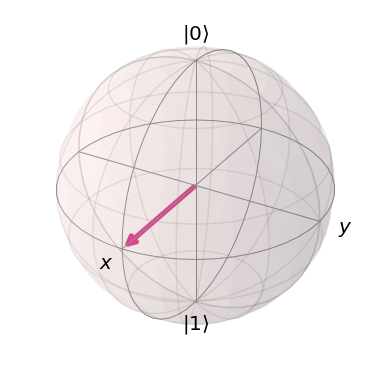

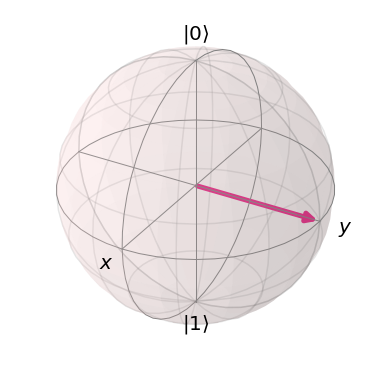

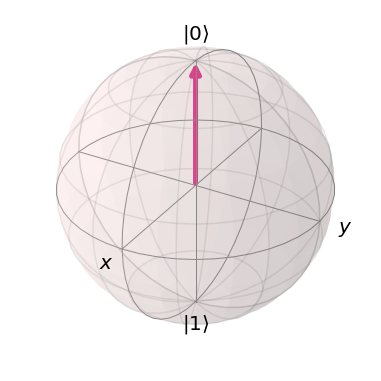

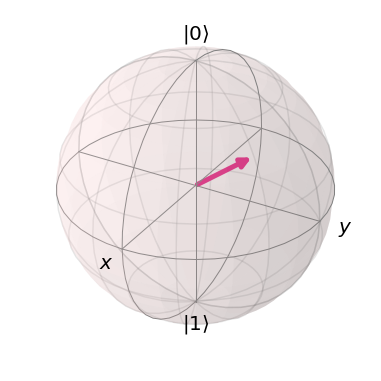

In [9]:
# Bloch-Kugel
from qiskit.tools.visualization import plot_histogram, plot_state, plot_bloch_vector
plot_bloch_vector([1,0,0])
plot_bloch_vector([0,1,0])
plot_bloch_vector([0,0,1])
# superposition
plot_bloch_vector([1,1,1])

Nun kann nach gleichem Schema den Zustand für zwei Qubits konstruieren:

$$|\psi\rangle = \alpha_{00}*|00\rangle +  \alpha_{01}*|01\rangle +\alpha_{10}*|10\rangle +  \alpha_{11}*|11\rangle = \alpha_{00}*\left(\begin{array}{cccc} 1 \\ 0 \\ 0 \\ 0 \end{array}\right) +  \alpha_{01}*\left(\begin{array}{cccc} 0 \\ 1 \\ 0 \\ 0 \end{array}\right) + \alpha_{10}*\left(\begin{array}{cccc} 0 \\ 0 \\ 1 \\ 0 \end{array}\right) +  \alpha_{11}*\left(\begin{array}{cccc} 0 \\ 0 \\ 0 \\ 1 \end{array}\right) = \left(\begin{array}{cccc} \alpha_{00} \\ \alpha_{01} \\ \alpha_{10} \\ \alpha_{11} \end{array}\right) \,\,\,\,\,\,\,\,(3.3)$$

Auch hier gilt wieder:

$$|\alpha_{00}|^2 + |\alpha_{01}|^2 + |\alpha_{10}|^2 + |\alpha_{11}|^2= 1. \,\,\,\,\,\,\,\,(3.4)$$

Allgemein für $n$-Qubits formuliert:

$$|\psi\rangle = \sum_{0 \leq x \leq 2^n} \alpha_x * |x\rangle_n \,\,\,\,\,\,\,\,(3.5)$$

$$ \sum_{0 \leq x \leq 2^n} |\alpha_x|^2 = 1 \,\,\,\,\,\,\,\,(3.6)$$

Wir wissen, dass der Zustand eines Cbits nur ein Produkt aus $|0\rangle$-en und $|1\rangle$-en von $2^n$ Möglichkeiten gemäss (1.4) sein kann. Der Zustand eines Qubits ist jedoch eine Superposition von allen $2^n$ Möglichkeiten und kann in der Regel nicht durch Produkten von 1-Qubit Zustände ausgedrückt werden. Hat man zwei oder mehr solcher Zustände spricht man von verschränkten Zuständen oder Quantenverschränkung.

### 2.4.1 Quantenverschränkung
 Durch gewisse Verfahren lassen sich mehrere Quanten auch miteinander verschränken. Eine Quantenverschränkung wird erzeugt, wenn Quantenobjekte in einer Quelle gemeinsam als Paar erzeugt werden. Sind zwei Quanten miteinander verschränkt, existiert eine seltsame, dauerhafte Bindung zwischen ihnen – egal wie weit sie voneinander entfernt sind. Wird eines der Quanten dann verändert, ändert sich das mit mit ihm verschränkte Quant augenblicklich auch. Ohne Zeitverzögerung und ganz egal, welche Entfernung zwischen ihnen liegt.

Quanten haben seltsame Eigenschaften: so lange ein Quant nicht gemessen wird, ist sein Zustand unbestimmt. Das nennt man „unscharf“. Erst wenn man es beobachtet, also eine Messung stattfindet, nimmt ein Quant einen ganz bestimmten, nun definierbaren Zustand ein. Und das mit ihm verschränkte Teilchen nimmt dann ebenfalls augenblicklich, ohne die geringste Zeitverzögerung, den selben Zustand ein. 

### 2.4.2 Reversible Operationen auf Qubits
Der klassische Computer hat nur eine einzige nichttriviale, reversible Operation: die NOT-Operation $X$ aus (1.5). 
Das sieht bei einem Quantencomputer anderst aus. Der Rahmen der reversiblen Operationen, die ein Quantencomputer an einem einzelnen Qubit ausführen kann, beschränkt sich dabei auf beliebige lineare Transformationen und deren Überlagerungen (Stichwort Schrödinger), die Einheitsvektoren in Einheitsvektoren abbilden. Man nennt solche Transformationen unitär. Eine Matrix $U$ ist unitär, wenn das Produkt der adjungierte Matrix $\bar{U}$ die Einheitsmatrix $I = 1$ ergibt: 

$$ U*\bar{U} = \bar{U}*U = I = 1 \,\,\,\,\,\,\,\,(3.7)$$

Diese Eigenschaft ist entscheidend für die Funktionalität eines Quantencomputer.

### 2.4.3 Implementation eines Qubits
Theoretisch kann jedes quantenmechanische Zweizustandssystem als Qubit verwendet werden. In der Praxis jedoch sind viele Systeme ungeeignet, da sie nicht in ausreichendem Maße manipulierbar sind oder zu stark von der Umgebung gestört werden.

Eine Implementation hierfür ist die Polarisation eines Photons. Die Polarisation übernimmt die gleiche Aufgabe wie die Spannungsunterschiede im klassischen Computer. Die Polarisation von Licht gibt an, in welche Richtung Licht schwingt. Obwohl die Polarisation eigentlich eine Welleneigenschaft ist, kann sie auch für das einzelne Photon definiert werden, und alle Polarisationen sind auch für einzelne Photonen möglich. Es gibt sozusagen zwei „Ausgänge“, einen für parallel und einen für senkrecht polarisierte Photonen. Stellt man an beide Stellen einen Photon-Detektor, dann kann man so feststellen, ob das Photon parallel oder senkrecht zur optischen Achse polarisiert.
Photonen, die eine andere Polarisation aufweisen, kommen aber ebenfalls an diesen „Ausgängen“ heraus. An welchem „Ausgang“ ein solches Photon herauskommt, ist in diesem Fall jedoch nicht voraussagbar; nur die Wahrscheinlichkeit kann vorhergesagt werden, was der Grund ist, wieso wir Wahrscheinlichkeiten in den Rechnungen mit Qubits finden.

Für die Verwendbarkeit eines Systems als Qubit hat David DiVincenzo sieben Kriterien aufgestellt. Die ersten fünf Kriterien betreffen auch die Verwendung in Quantencomputern, die letzten beiden gelten speziell für die Quantenkommunikation.

#### Die fünf allgemeinen Kriterien
- Das System muss wohldefinierte Qubits besitzen und skalierbar sein, sprich es muss prinzipiell auf beliebig viele Qubits erweiterbar sein.
- Es muss möglich sein, die Qubits in einem reinen Zustand zu präparieren (mindestens in den Zustand $|00000\ldots\rangle$).
- Das System muss eine hinreichend lange Dekohärenzzeit aufweisen.
- Das System muss die Implementierung eines universellen Satzes von Quantengattern erlauben. Ein Beispiel wäre z. B. alle 1-Qubit-Gatter und zusätzlich das CNOT-Gatter.
- Es muss möglich sein, jedes einzelne der Qubits gezielt zu messen.

#### Die zwei zusätzlichen Kriterien für Quantenkommunikation
- Es muss möglich sein, stationäre Qubits in bewegliche Qubits zu transformieren und umgekehrt.
- Ein Austausch der beweglichen Qubits muss zwischen entfernten Orten möglich sein.

## 2.5 Quantengatter
Im Kapitel Cbit haben wir die Mathematik von Matrizen und deren Auswirkungen angeschaut. Nun kommen wir zu deren Implementation, den Quantengattern. Der Quantencomputer benutzt wie auch der klassische Computer Gatter, um die Bits zu manipulieren. Bei beiden Computerarchitekuren gilt: Man möchte ein Gleichgewicht zwischen effizienter Berechnungen und realitätsnahe Implementation finden. Der klassische Computer ist normalerweise mit den sieben Gatter NOT, AND, NAND, OR, NOR, XOR, NXOR realisiert, könnte aber auch mit einem einzigen Gatter z. B. mit dem NOR-Gatter (Effizienz leidet) oder mit 100 verschiedenen Alex-Gattern (Ingineur leidet) implementiert werden. Es hat sich ergeben, dass der klassischen Computer mit den sieben Gatter sehr gut funktioniert. Nun stellt sich die Frage, mit wievielen Gattern der Quantencomputer am besten funktioniert? Und wie sehen sie aus?

Ein Quantengatter arbeitet mit quantenmechanischen Systemen wie z. B. mit dem Spin eines Elektrons. Auch wenn ihr Name es suggeriert, stellen Quantengatter in der Regel keine physikalischen Bauelemente wie Transistoren dar. Ein Quantengatter ist vielmehr eine zeitlich steuerbare Wechselwirkung der Qubits untereinander oder mit der Umgebung. Wie bereits bei den Qubits werden auch die Quantengatter abstrahiert. Aus mathematischer Sicht ist ein Quantengatter eine unitäre Transformation $U$ , welche auf einen Zustand $\psi_i$  der Qubits angewendet wird und den Zustand $U*\psi = \psi_{i+1}$ erzeugt.
Die Definitionen der Matrizen aus den Kapitel Cbits doch also noch zu gebrauchen.

### 2.5.1 Komplexe Zahlen
Der Gesamtzustand einer Quantenberechnung setzt sich aus komplexen Zahlen zusammen, sogennante Amplituden. Die Amplituden können mit Hilfe von Pfeilen (Richard Feynman) und eines quadratischen Diagramms dargestellt werden, sodass die verschiedenen Komponenten einer komplexen Zahl visualisiert:

<img src="src_picture\square-diagram.gif" alt="drawing" width="130"/>

Der Pfeil zeigt auf den komplexen Wert der Amplitude. Dabei ist:
- der Realteil der X-Offset des Pfeils 
- der Imaginärteil der Y-Offset des Pfeils
- die Größe die Länge des Pfeils
- die Phase die Richtung des Pfeils 
- die Wahrscheinlichkeit eines Zustands (quadrierte Amplitude) die eusgefüllte Fläche

Das Ergebnis einer __Addition__ ist somit der resultierende Vektor:  

<img src="src_picture\adding-complex-number.gif" alt="drawing" width="300"/>

Um zwei komplexe Zahlen zu __multiplizieren__, werden ihre Phasen addieren und ihre Grössen multiplizieren:

<img src="src_picture\complex-product.gif" alt="drawing" width="300"/>

### 2.5.2 Pauli-X-Gatter
Der Pauli-X-Gatter wirkt auf ein einziges Qubit und entspricht dem NOT-Operator aus (1.8). Er bewirkt eine Drehung der Blochkugel um die X-Achse.

- Matrixdarstellung:

$$X = \left(\begin{array}{cc} 0 &1\\1&0\\\end{array}\right) \,\,\,\,\,\,\,\,(1.8)$$

- Vektordarstellung:


- Gatterdarstellung:

<img src="src_picture\X-Gate.gif" alt="drawing" width="200"/>

Der Input befindet sich im On-Zustand, wodurch die erste Spalte der Matrix als Ausgang gewählt wird, was dazu führt, dass sich der Output im Off-Zustand befindet. Wäre der Input im Off-Zustand gewesen, dann wäre die zweite Spalte der Matrix ausgewählt worden und der Output wäre im On-Zustand gewesen.

### Pauli Z-Gatter ?

### Hadamard-Gatter
Auch das berühmte Hadamard-Gate (1.50), welches oft zum Beginn eines Algorithmus angewendet wird um die Zustände in Superposition zu bringen, kann als Grafik dargestellt werden.

$$H = \frac{1}{\sqrt{2}}*\left(\begin{array}{cc} 1&1\\1&-1\end{array}\right) \,\,\,\,\,\,\,\,(1.50)$$

<img src="src_picture\H-Gate.gif" alt="drawing" width="500"/>

Zu bemerken ist, dass der On-Anfangszustand in blau und der Off-Anfangszustand in rot, nachdem sie in Superposition gebracht worden sind, zwar beide die gleiche Wahrscheinlichkeitsverteilung haben, jedoch der untere Pfeil jeweils um 180° in die entgegengesetzte Richtung zeigt. Würde man also nach der ersten $H$-Operation messen, so würde man beides mal das gleiche Ergebnis erhalten. Der ursprüngliche Zustand ist in der Phase codiert.

Komplexer wird es mit mehreren Qubits. Angenommen, wir wollen ein Hadamard-Gate auf einen einzelnes Qubit in einer n-Qubitschlatung anwenden. Wir haben eine $2\times2$-Matrix, aber jede Operation auf einer n-Qubitschaltung muss durch $2^n\times2^n$-Matrizen dargestellt werden. Die Natur verhält isch automatisch so, doch wie simuliert man solche Gleichungen?

Jeder globale Zustand beinhaltet den Zustand des Qubits, das wir beeinflussen wollen. Wenn wir ein einzelnes Qubit manipulieren wollen, dann müssen wir jeden globalen Zustand manipulieren. Das wird erreicht, indem die gewünschte  $2\times 2$-Matrix für jede Kombination von Zuständen der anderen Qubits angewendet wird.

Das folgende Diagramm zeigt eine 2-Qubitschaltung, die das Hadamard-Gatter zuerst auf das eine und danach auf das andere Qubit anwendet, um so beide Qubits in die Superposition zu bringen:

<img src="src_picture\H2-Gate.gif" alt="drawing" width="550"/>

Die $H$-Matrizen können auch zu einem Gatter zusammengefasst werden:

<img src="src_picture\H2-H2-Gate.gif" alt="drawing" width="500"/>


Interessant finde ich das Thema Spin. Obwohl z.B. der Spin eines Elektrons klassisch nicht erklärbar ist, wie oder wodurch der Spin zustande kommt, ist es gewissen Menschen gelungen die Eigenschaft eines Elektronenspins zu gebrauchen um damit Quantencomputing zu betreiben. Faszinierend! Bei einem gegebenen Wert von s kann der Spin nur in 2s + 1 verschiedenen Richtungen gemessen werden. Ein Elektron mit s = 1/2 hat also nur zwei mögliche Richtungswerte – diese werden oft mit „up“ und „down“ bezeichnet – und kann somit optimal als Zweizustandssystem verwendet werden.

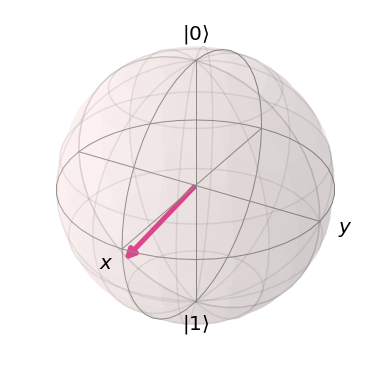

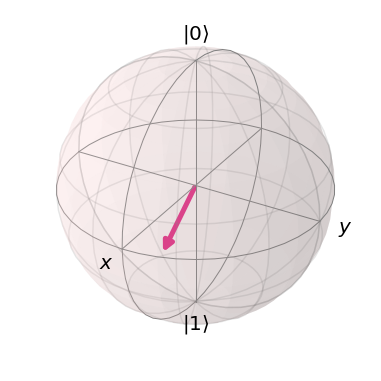

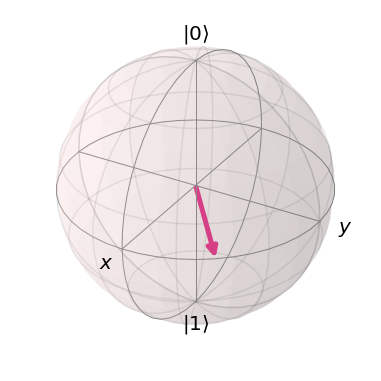

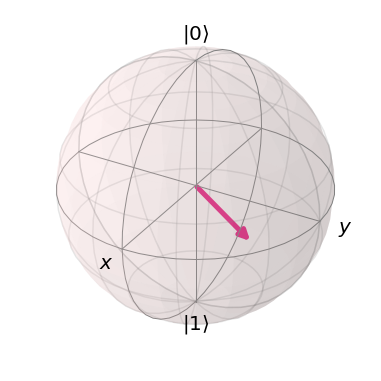

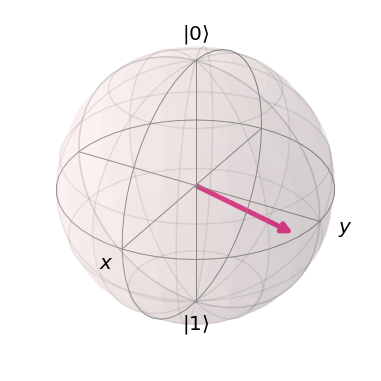

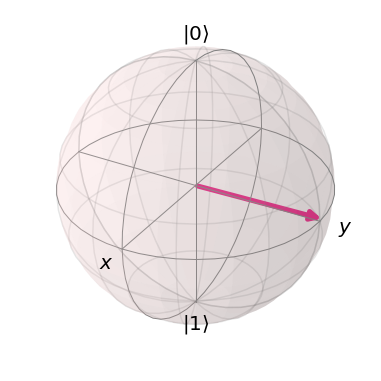

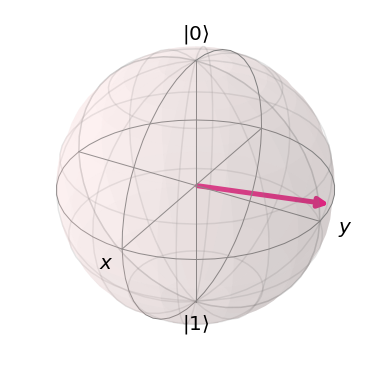

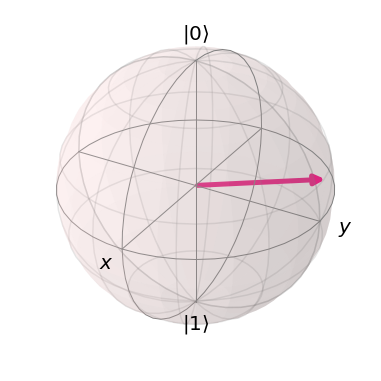

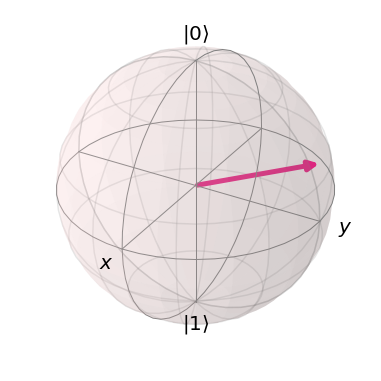

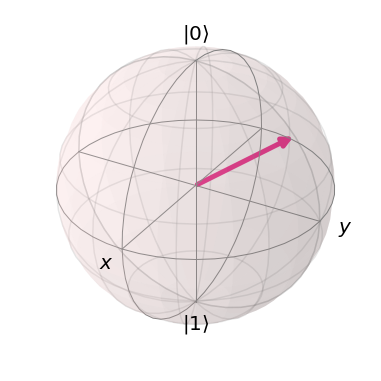

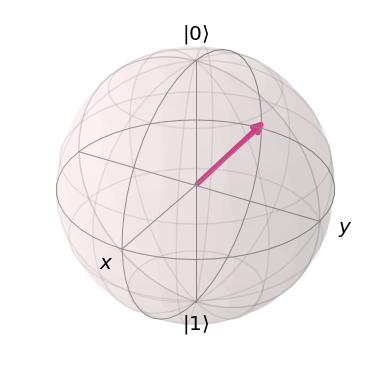

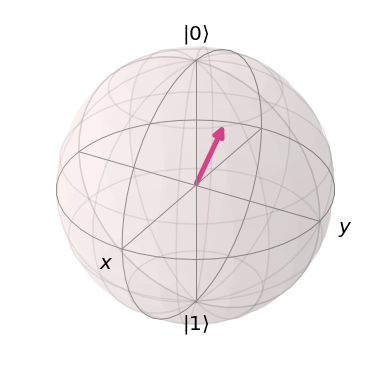

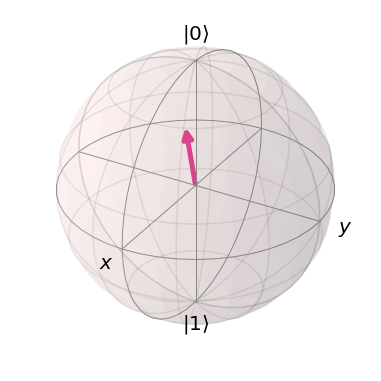

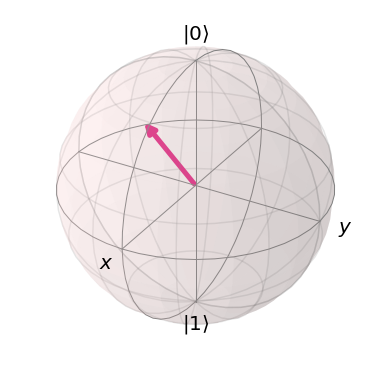

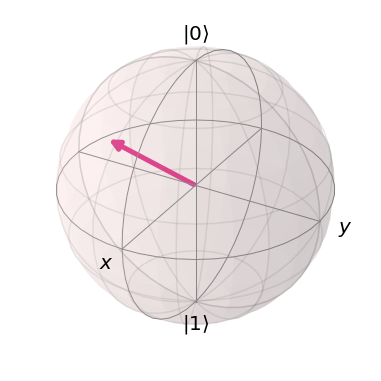

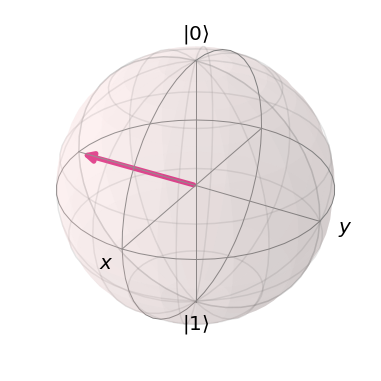

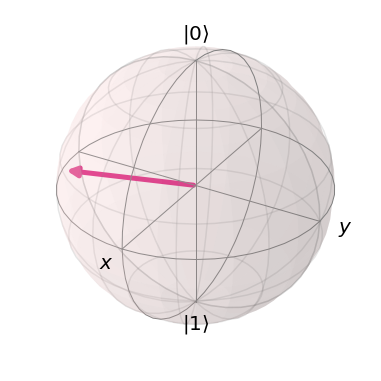

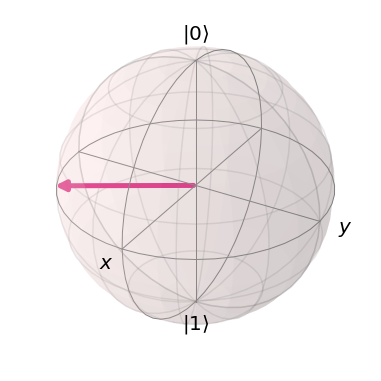

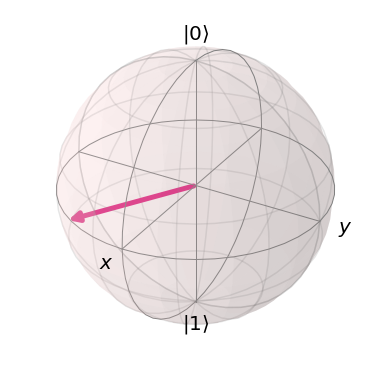

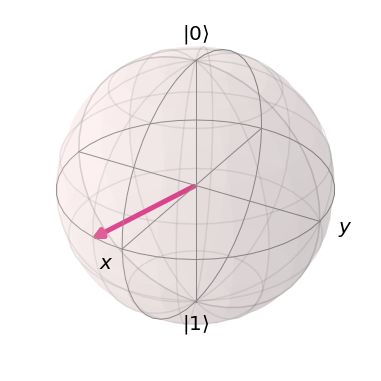

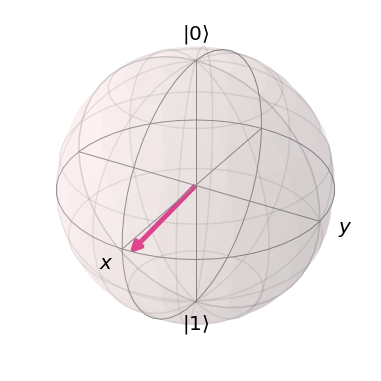

In [5]:
# quantum_phase_bloch.py
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.tools.visualization import plot_bloch_vector

# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()

meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.barrier()
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u1(phase, q)
    circuits.append(pre + middle + meas_x)
    circuits.append(pre + middle + meas_y)
    circuits.append(pre + middle + meas_z)
    
# Execute the circuit
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

# Plot the result
for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1
    plot_bloch_vector(bloch)

# Der Grover-Algorithmus

Der Grover-Algorithmus wurde von Lov Grover im Jahre 1994 veröffentlicht und ist ein Quantenalgorithmus zur Suche in einer unsortierten Datenbank mit $N$ Einträgen. Dazu benötigt er lediglich $O(\sqrt N)$ Schritte. Im vergleich zum klassichen Computer, der schnellstmöglich nur linear Suchen kann und somit $O(N)$ Schritte benötigt, liefert der Grover-Algorithmus eine quadratische Beschleunigung, was für grosse $N$ beträchtlich ist.

Wie die meisten Quantenalgorithmen ist auch der Grover-Algorithmus ein probabilistischer Algorithmus, dass heisst, er gibt die korrekte Antwort mit hoher Wahrscheinlichkeit, wobei die Wahrscheinlichkeit einer fehlerhaften Antwort durch  Wiederholung des Algorithmus bis zu einem gewissen Grad verkleinert werden kann.

Der Grover-Algorithmus ermöglicht __nicht__ die __direkte Suche__ in unsortierten Datenbanken, sondern ist ein Teilschritt einer vierstüfigen Schrittabfolge:

__1. Initialisierung der Register:__ Daten codieren mit $|0\rangle^{\bigotimes n}$.

__2. Anwedung des Hadamard-Gatters $H^{\bigotimes n}$:__ $$|\psi\rangle = H^{\bigotimes n}*|0\rangle^{\bigotimes n} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle$$

__3. Iteration über $G:$~ $O(\sqrt(N))$:__ 
- __3.1 Anwedung des Orakels $U_f$:__ Markiert gesuchtes Element in der Liste.
- __3.2 Anwedung des Hadamard-Gatters $H^{\bigotimes n}$.__
- __3.3 Anwegund des Grover-Diffusions-Operator $D = -1+2*|0\rangle \langle0|$:__ Berechnet den Durchschnitt aller Zustände und spiegelt sie anschliessend am Durchschnitt in Richtung der X-Achse.
- __3.4 Anwedung des Hadamard-Gatters $H^{\bigotimes n}$.__

$$G = (H^{\bigotimes n}*D*H^{\bigotimes n})*U_f$$
$$ = (-(H^{\bigotimes n}*1*(H^{\bigotimes n} + 2*(H^{\bigotimes n}*|0\rangle \langle0|*(H^{\bigotimes n})*U_f$$
$$ = (-1+2*|\psi\rangle \langle\psi|)*U_f$$
$$ = (2*|\psi\rangle \langle\psi|-1)*U_f$$

__4. Messung der Qubits__: Daten decodieren indem Ergebnis entquantisiert und ausgelesen wird.

<p align="center">
  <img src="src_picture\overview.png" alt="drawing" width="700"/>
</p>

## 1. Schritt: Initialisierung der Register
Als erstes müssen die Register initialisiert werden, indem wir die Qubits auf die Cbits mappen. Dies ist insofern nötig, da die Qubits nicht direkt ausgelesen werden können. Erst mit der nicht unitären Operation, der Messung, erwzingen wir einen klassischen Zustand. Codiert sieht die Initialisierung für zwei Qubits folgendermassen aus:

In [1]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
# Define the number of your qbits
N = 2
# Create a Quantum Register with N-qubits.
q = QuantumRegister(N)
# Create a Classical Register with N-bits.
c = ClassicalRegister(N)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)
qc.measure(q, c)
circuit_drawer(qc)

QISKitError: 'Invalid circuit! Please check the syntax of your circuit.Has the Qasm parsing been called?. e.g: unroller.execute().'

## 2. Schritt: Anwendung des Hadamard-Gatters
<img src="src_picture\search.png" alt="drawing"  width="800"/>
Der Ausgangspunkt: wir haben keine Ahnung, wo das gesuchte Element $w$ ist. Daher ist jede Schätzung der Position der Lösung so gut wie jede andere, ergo muss auch jedes Element mit einer gleichen Wahrscheinlichkeit auftreten.
Ein typischer nächster Schritt in einem Quantenalgorithmus, einschließlich des Grover-Algorithmus, besteht darin, allen möglichen Zustände eine gleiche Wahrscheinlichkeit zu zuordnen. 
Per Hadamard-Gatter $H$ wird jedes Element $|x\rangle$ der Liste mit einer Superposition $|s\rangle$ gleichgesetzt. Dabei sind die Amplituden und unmittelbar auch die Wahrscheinlichkeit der verschiedenen Superpositionen $|s\rangle$ definiert als:
$$|s⟩=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$$

__Das Quadrat der Amplitude eines Zustands $|s\rangle$ ist die Wahrscheinlichkeit, diesen Zustand $|s⟩$ zu beobachten.__

Nehmen wir als Beispiel ein $n$-Qubit-System mit $n=2$. Das Systems hat somit $n^2=N=4$-dimensinalen Zustandsraum ($00_b, 01_b, 10_b$ und $11_b$), oder anderst ausgedrückt eine Datenbank mit vier Einträgen, welche alle die gleiche Wahrscheinlichkeit besitzen, nämlich $\frac{1}{4}$. Die zweite Wurzel der Warscheinlichkeit ergbit die Amplitudenstärke $\frac{1}{2}$. Gesucht ist $w=10_b=2_d$. Ziel ist es die Wahrscheinlichkeit des markierten Elements gegen $1$ laufen zu lassen bzw. geometrisch betrachtet den gesuchten Zustand $|\psi\rangle$ möglichst senkrecht nach $|w\rangle$ und die restlichen Zustände horizontal nach states-$|s\rangle$ zu transformieren:


<img src="src_picture\1-p.png" alt="drawing" width="550" /> $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$<img src="src_picture\2-p.png" alt="drawing" width="400"/>

Wenn wir nun an dieser Stelle in der Standardbasis $|x\rangle$ messen würden, würde diese Superposition gemäß dem fünften Quantengesetz zu einem der Basiszustände mit der gleichen Wahrscheinlichkeit von $\frac{1}{N} = \frac{1}{2^n}$ zusammenbrechen. Unsere Chancen, den richtigen Wert $w$ zu schätzen, wären daher $1$ zu $2^n$, sprich wir müssten im Durchschnitt $N = 2^n$ mal raten um das gesuchte Element zu finden, was schlechter als die klassiche Suche wäre.

Simulation:  COMPLETED
Output:  {'00': 254, '11': 258, '01': 254, '10': 234}


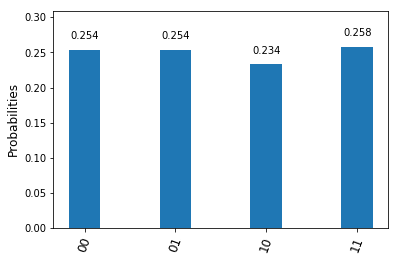

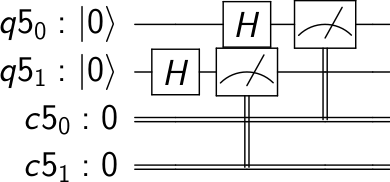

In [6]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Define the number of your qbits
N = 2
# Create a Quantum Register with N-qubits.
q = QuantumRegister(N)
# Create a Classical Register with N-bits.
c = ClassicalRegister(N)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)
# Add H-gate on qubit 0 and 1 to putting in superposition.
qc.h(q[0])
qc.h(q[1])
qc.measure(q, c)
# Get ibmq backend
backend_sim = Aer.get_backend('qasm_simulator')
# Compile and run the Quantum circuit on a simulator backend
sim_result1 = execute(qc, backend_sim, shots=1000).result()
counts1 = sim_result1.get_counts(qc)
# Show the results as text and plot
print("Simulation: ", sim_result1)
print("Output: ", counts1)
plot_histogram(counts1)
circuit_drawer(qc)

## 3. Schritt: Iterationen über unitäre Operationen
### 3.1 Anwedung des Orakels $U_f$
Nun kommt die Magic ins Spiel: das Orakel. Das Orakel kann als Funktion abstrahiert werden, welches das gesuchte Element $w$ markiert, indem es die Amplitude von $w$ an der X-Achse spiegelt, was bedeutet, dass die Amplitude von $w$ nun negativ ist. Wenn also $x=w$ dann wird $f(x) = f(x)^{-1}$ und für alle anderen Wert wird $f(x) = f(x)$ ausgeführt. Im Beispiel wäre also die Wahrscheinlichkeit nach der Markierung des gesuchten $w=01_b=-\frac{1}{4}$. Da jedoch der Betrag der Wahrscheinlichkeit der Zustände unverändert bleiben, können wir die Lösung so nicht auslesen. Der Grover-Diffusions-Operator (3.3) wird dieses Problem lösen. 

<img src="src_picture\3-p.png" alt="drawing" width="550"/>

<img src="src_picture\4-p.png" alt="drawing" width="400"/>

### Orakel Herleitung
Vorneweg möchte ich zunächst die Relation zwischen Funktion und Matrix erläutern. Dies finde ich insbesondere wichtig, da wir uns nur noch mit Matrizen rumschlagen, angefangen bei den Cbits und Qbits, über das Orakel hinweg bis hin zum Grover Algorithmus.

__Jede lineare Funktion $f(x)$ kann durch eine Matrix $M$ dargestellt werden.__ 

Es gilt $f(x)=M$, wenn für $f(x)$ = linear.

Wir können also z. B. $f(x)=2*x$ als $ \left(\begin{array}{c} 2\end{array}\right)$ schreiben. 

### Deutsch-Jozsa-Algorithmus
Der Deutsch-Algorithmus bestimmt ob eine Funktion $f(x)$ balanciert oder konstant ist. Dabei wird die Inputmenge $\{0,1\}$ auf die Outputmenge $\{0,1\}$ abgebildet.
Es gibt nur folgende vier mögliche Funktionen:

$$x = 0 \to f(x) = 0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 0 \searrow f(x) = 0$$
$$x = 1 \to f(x) = 1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 1 \nearrow f(x) = 1$$

$$x = 0 \to f(x) = 0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 0 \searrow f(x) = 0$$
$$x = 1 \nearrow f(x) = 1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, x = 1 \to f(x) = 1$$

Eine Funktion gilt als balanciert, wenn $f(0) \neq f(1)$ und gilt als konstant, wenn $f(0) = f(1)$.

Um nun eine Funktion $f(x)$ die Eigenschaft balanciert oder konstant zuzuweisen muss ein klassischer Computer $f(x)$ genau zweimal auswerten:

$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \nearrow \, f(0)=0,\,\,f(1)=0:\,\,konstant\,\,\,$$
$$ \nearrow \, f(0)=0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, $$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \searrow \, f(0)=0,\,\,f(1)=1:\,\,balanciert$$
$$\bigodot \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \nearrow \, f(0)=1,\,\,f(1)=0:\,\,balanciert$$
$$ \searrow \, f(0)=1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$
$$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \searrow \, f(0)=1,\,\,f(1)=1:\,\,kosntant\,\,\,$$

$$\,\,\,\,\,\,\,\,\,Auswertung_1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,Auswertung_2\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$

Nun stellt sich die entscheidende Frage: __Kann das ein Quantencomputer besser?__ Im Jahre 1992 beantworteten diese Frage David Deutsch and Richard Jozsa mit einem klaren __Ja__. Mit diesem Algorithmus legten sie den Grundstein für den Grover-Algorithmus.

Wir wissen, dass alle Quantengatter, die auf Quantenzuständen wirken, durch unitäre Matrizen dargestellt werden. Es stellt sich nun die Frage: Kann man die Funktion $f(x)$ als gültige Operation ausdrücken?

Um das Problem zu veranschaulichen, analysieren wir eine der oben dargestellten Funktionen:

$$x = 0 \searrow f(x) = 0$$
$$x = 1 \to f(x) = 1$$

Die Inpute diese einfache Funktion initialisiert werden mit

$$|0\rangle = \left(\begin{array}{c} 1\\0 \end{array}\right)$$

$$|1\rangle = \left(\begin{array}{c} 0\\1 \end{array}\right)$$

woraus wir die Matrix $M$ bilden können:

$$M = \left(\begin{array}{c} 0 & 0\\1 & 1 \end{array}\right)$$

Somit ergbit sich für

$$f(|0\rangle) = \left(\begin{array}{c} 0 & 0\\1 & 1 \end{array}\right)* \left(\begin{array}{c} 1\\0 \end{array}\right) = \left(\begin{array}{c} 0\\1 \end{array}\right)$$
und
$$f(|1\rangle) = \left(\begin{array}{c} 0 & 0\\1 & 1 \end{array}\right)* \left(\begin{array}{c} 0\\1 \end{array}\right) = \left(\begin{array}{c} 0\\1 \end{array}\right)$$

Diese Matrix $M$ ist jedoch kein gültiger Quantengatter. 

Um nun eine unitäre Matrix $U_f$ zu konstruieren brauchen wir den cNOT-Operator (1.17) als Unterstützung:

<img src="src_picture\U-cNOT.png" alt="drawing" width="240" />

Das Qbit $|x\rangle$ ist das Inputbit, an dem wir die Funktion auswerten wollen und $|y\rangle$ ist das Control-Bit. Es kann nun bewiesen werden, dass die Matrix $U_f$ unitär ist, indem sie einfach zwei mal hintereinander ausgeführt wird:

<img src="src_picture\circuit_qf_reversible.png" alt="drawing" width="340" />

Der Zustand $|y\rangle$ wird zuerst zu $|x,y\bigoplus f(x)\rangle$ und nach dem zweiten Multiplikation mit $U_f$ zu

$|x,(y\bigoplus f(x))\bigoplus f(x)\rangle = |x,y\bigoplus (f(x)\bigoplus f(x))\rangle = |x,y\bigoplus 0 = |x,y\rangle$

und somit ist $U_f$ unitär. Wenn nun $|y\rangle = |0\rangle$ gesetzt wird, dann erhält man

$|x,y\bigoplus f(x)\rangle = |x,0\bigoplus f(x)\rangle = |x,f(x)\rangle$

Somit kann der gültige Quantengatter $U_f$ unsere Funktion $f(x)$ vollständig auswerten. Mit diesem Trick können wir jede beliebige Funktion mit $f:\{0,1\}^n\to\{0,1\}$ abbilden und so unsere Lösung markieren!

### Konstruktion des Orakels $U_f$
Bei Quantenalgorithmen wird in der Regel davon ausgegangen, dass das Orakel $U_f$ bereits konstruiert ist und man betrachtet es als eine Blackbox. Der Bau eines Orakels kann aufwändig sein, jedoch ist das nicht weiter "wichtig".

Zur Anschauung: Gegeben sei irgendeine Funktion, dessen Minimum gefunden werden sollte:

```
def func(x):
    return 17 * (x^3) + (8-x)^2
```
Wenn wir eine Geschwindigkeit des Optimierungsalgorithmus auf einem klassischen Computer messen, interessiert es uns nicht, wie die Funktion erstellt wurde. Die bereits gegebene Funktion kann mit der Rolle des Orakels gleichgesetzt werden. Angesichts der Eingabe $x$ fragen wir uns, was der Wert der Funktion an dem gesuchten Punkt, dem Minimum, ist. Wir betrachten die Funktion für den Optimierungsalgorithmus und somit das Orakel für den Grover-Algorithmus als gegebener Input. Wenn man aber zufällig gerade kein Orakel zur Hand hat, dann kann es natürlich mit einer Matrix abstrahiert werden, um den Grover-Algorithmus zu testen, jedoch sollte man im Hinterkopf den Gedanke behalten, dass die Konstruktion des Orakels __nicht__ Teil des Grover-Algorithmus ist.

Für unser Beispiel mit 

In [ ]:
# oracle
qc.h(q[1]);
qc.cx(q[0],q[1]);
qc.h(q[1]);

### 3.2 Anwedung des Hadamard-Gatters $H^{\bigotimes n}$
Nun werden die Zustände für das Herzstück des Grover-Algorithmus vorbereitet, indem wieder der bekannten Hadamard-Gatter angewendet wird:

In [ ]:
qc.h(q[0]);
qc.h(q[1]);

### 3.3 Anwedung des Grover-Diffusions-Operator
Nun kommt jedoch die Amplitudenmanipulation ins Spiel. Durch gezielte unitäre Operationen verstärkt sich die Amplitude des gesuchten Elementes $w=01_b$ und somit auch die Wahrscheinlichkeit signifikant. Zugleich sinken die Wahrscheinlichkeiten der anderen Elementen da die Summe aller Wahrscheinlichkeiten wobei natürlich die Summe aller Wahrscheinlichkeiten $= 1$ ist.

<img src="src_picture\5-p.png" alt="drawing" width="550" />

<img src="src_picture\6-p.png" alt="drawing" width="400" />


In [ ]:
# grover difiusion 
qc.h(q[1]);
qc.cx(q[0],q[1]);
qc.h(q[1]);
        
qc.x(q[0]);
qc.h(q[1]);
qc.cx(q[0],q[1]);
qc.x(q[0]);
qc.h(q[1]);
        
qc.h(q[0]);
qc.x(q[1]);
qc.cx(q[1],q[0]);
qc.h(q[0]);
qc.x(q[1]);

### 3.4 Anwedung des Hadamard-Gatters $H^{\bigotimes n}$
Und zum Schluss nocheinmal das Hadamard-Gatter:

In [ ]:
qc.h(q[0]);
qc.h(q[1]);

Die Teilschritte von 3. werden solange wiederholt, bis der markierte Zustand eine deutlich höhere Wahrscheinlichkeit aufweist als die restlichen Zustände. 

## Messung der Qbits


Um die Ergebnise nun auszulesen wird eine nicht unitäre Operation angewendet: Die Messung. Dabei werden die Quantenzustände von den Qubits in die klassischen Bits geschrieben:

In [ ]:
# measure
qc.measure(q, c)

## Qiskit - Quantum Information Science Toolkit - Entwicklungsumgebungen
Für die Implementierung von Quantenalgorithmen gibt es eine überschaubare Auswahl an Firmen die nicht nur eine Entwicklungsumgebung zur Simulation von Quantencomputer, sondern auch echte Quantencomputer bereitstellt, um den eigenen Code darauf ausführen zu lassen. Dazu gehören Qiskit von IBM, Cirq von Google und D-Wave 2000Q von D-Wave. Umgesetzt wurden die Algorithmen mit Qiskit.

[Qiskit](https://qiskit.org/) ist ein Open Source Quantencomputing Framework von IBM mit dem Ziel, unterschiedlichen Anwendergruppen den Zugang zur Programmierung zu öffnen: Quantenforscher und andere Wissenschaftler, Lehrer, Entwickler und allgemein Technologieinteressierte. Unsere Vision für Qiskit besteht aus vier fundamentalen Elementen: Terra (die Code Basis, um Quantenprogramme auf dem Level von Schaltungen und Pulsen zu verfassen), Aqua (um Algorithmen und Applikationen aufzubauen), Ignis (um Rauschen und Fehler zu behandeln) und Aer (um die Entwicklung per Simulatoren, Emulatoren und Debuggern zu beschleunigen).

### Terra-Aqua-Air Setup
Als erstes muss das Fundament [Terra](https://github.com/Qiskit/qiskit-terra) installiert werden. Es erlaubt dem Benutzer, Quantenschaltungen einfach zu schreiben, und kümmert sich um die Einschränkungen der realen Hardware. Um den Code nicht bloss auf Simulationen laufen zu lassen, wird ein API-Token benötigt. Die Anleitungen inklusive Tutorials sind unter GitHub sehr gut dokumentiert.
Anschliessend kann [Aqua](https://github.com/Qiskit/aqua) installiert werden.


### Erste Ausführung auf einem Quantencomputer: Der Bell-Zustand
Um mit der Syntax vertraut zu werden, erstellen wir einen simplen Bell-Zustand. Eine Übersicht die Basic-Befehle gibt es unter [Qiskit-Tutorial](https://github.com/Qiskit/qiskit-tutorial). Qiskit hat einige gute Tutorials dabei.

Den [Bell-Zustand]() haben wir ja theoretisch bereits kennengelernt. Wir wollen nun prüfen, ob die Qbits auch in der Praxis verschränkt sind und sich dementsprechend verhalten. Zuerst werden wir den Code auf der Aer-Simulation und danach auf einem echten Quantencomputer von IBM laufen lassen. 

Für den Bell-Zustand benötigen wir nur folgende Elemente:
- QuantumRegister: Hier werden unsere Qbits platziert
- ClassicalRegister: Hier werden unsere Cbits platziert
- QuantumCircuit: Wir mappen die Qbits auf die Cbits, indem wir eine Messung durchführen. In diesem Moment verändern wir die Wirklichkeit und die Elektronen müssen sich "entscheiden", was uns dann das Ergebnis als WKS-Verteilung ausgibt.
- Ein Hadamard-Gate
- Ein cNOT-Gate

Wir setzen q0 in Superposition per H-Gate. Danach wählen wir per cNOT-Gate q0 als Statebit und q1 als Targetbit.
Um einen Circuit mit zwei Qbits zur erzeugen und auf einem Simulator, der in Qiskit enthalten ist, auszuführen, reicht folgender Code:

#### Bell-Zustand mit Aer-Backend (Simulation)

Aer backends:  [<QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>]
First simulation:  COMPLETED
Output:  {'00': 1, '11': 1}
Second simulation:  COMPLETED
Output:  {'00': 494, '11': 506}


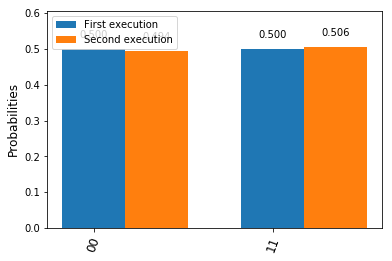

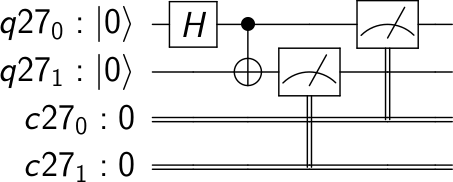

In [29]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2)
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(q[0], q[1])
# Add a Measure gate to see the state.
qc.measure(q, c)

# See a list of available local simulators
print("Aer backends: ", Aer.backends())
backend_sim = Aer.get_backend('qasm_simulator')

# Compile and run the Quantum circuit on a simulator backend
sim_result1 = execute(qc, backend_sim, shots=2).result()
sim_result2 = execute(qc, backend_sim, shots=1000).result()
counts1 = sim_result1.get_counts(qc)
counts2 = sim_result2.get_counts(qc)

# Show the results as text and plot
print("First simulation: ", sim_result1)
print("Output: ", counts1)
print("Second simulation: ", sim_result2)
print("Output: ", counts2)
legend = ['First execution', 'Second execution']
plot_histogram([counts1,counts2], legend=legend)
circuit_drawer(qc)

Dieser Output sagt uns, das unsere 1000 Shots ziemlich gleichverteilt sind. Sprich wenn q0 = 0 dann ist zeitgleich q1 = 0 und wenn q0 = 1 dann q1 = 1.

Nun wollen wir aber endlich unseren Code des Bell-Zustands auf einem echten Quantencomputer compilieren:

#### Bell-Zustand mit IBMQ-Backend (Quantencomputer)

Remote backends:  [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]
Running on current least busy device:  ibmqx4
First experiment:  COMPLETED
Output:  {'00': 472, '01': 81, '10': 60, '11': 411}
Second experiment:  COMPLETED
Output:  {'00': 448, '01': 62, '10': 61, '11': 453}


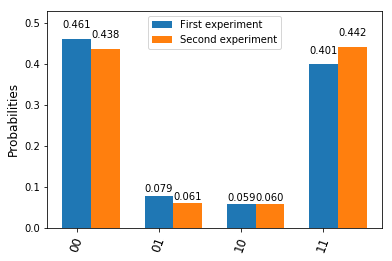

In [16]:
# Import the Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import execute, IBMQ, Aer
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Authenticate for access to remote backends
try:
    import Qconfig
    IBMQ.load_accounts()
except:
    print("""WARNING: There's no connection with the API for remote backends.
             Have you initialized a file with your personal token?
             For now, there's only access to local simulator backends...""")

try:
    # Create a Quantum Register with 2 qubits.
    q = QuantumRegister(2)
    # Create a Classical Register with 2 bits.
    c = ClassicalRegister(2)
    # Create a Quantum Circuit
    qc = QuantumCircuit(q, c)

    # Add a H gate on qubit 0, putting this qubit in superposition.
    qc.h(q[0])
    # Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
    # the qubits in a Bell state.
    qc.cx(q[0], q[1])
    # Add a Measure gate to see the state.
    qc.measure(q, c)

    # see a list of available remote backends
    ibmq_backends = IBMQ.backends()

    print("Remote backends: ", ibmq_backends)
    # Compile and run the Quantum Program on a real device backend
    try:
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        #running the job twice and get counts
        result_exp1 = execute(qc, least_busy_device, shots=1024, max_credits=10).result()
        result_exp2 = execute(qc, least_busy_device, shots=1024, max_credits=10).result()
        counts01 = result_exp1.get_counts(qc)
        counts02 = result_exp2.get_counts(qc)

        # Show the results
        print("First experiment: ", result_exp1)
        print("Output: ", counts01)
        print("Second experiment: ", result_exp2)
        print("Output: ", counts02)
        legend = ['First experiment', 'Second experiment']
        plot_histogram([counts01,counts02],  legend=legend)
    except:
        print("All devices are currently unavailable. Try again later.")

except QISKitError as ex:
    print('There was an error in the circuit!. Error = {}'.format(ex))

Auch der Quantencomputer gibt uns für 00 und 11 die grösste WSK aus, jedoch haben auch die anderen Zustände eine WSK. Das ist nachvollziehbar, da zu Beginn der Initialisierung jeder Zustand die gleiche WSK hat, danach beim Versetzen in den Bell-Zustand wachsen die Verschränkten Zustände und die anderen sinken, jedoch niemals auf 0.

# Grover mit 2 Qbits Orakel = 11

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, Aer, backends, IBMQ
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = True

# define the number of your Qbits
N = 2

try:
    # Create a Quantum-Register with N qubits / initialize N-Qbits.
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    qc = QuantumCircuit(q, c)
    
    # Create superposition
    qc.h(q[0])
    qc.h(q[1])

    n = 0
    # avarage of ~O(sqrt(N)) repititions
    while n < 1:
        # apply the oracle
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.h(q[1]);
        
        qc.h(q[0]);
        qc.h(q[1]);

        # grover difiusion 
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.h(q[1]);
        
        qc.x(q[0]);
        qc.h(q[1]);
        qc.cx(q[0],q[1]);
        qc.x(q[0]);
        qc.h(q[1]);
        
        qc.h(q[0]);
        qc.x(q[1]);
        qc.cx(q[1],q[0]);
        qc.h(q[0]);
        qc.x(q[1]);
        
        qc.h(q[0]);
        qc.h(q[1]);
        
        n = n + 1

    # measure
    qc.measure(q, c)
      
        
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01,counts02], legend=legend, options={'label':'binary'})
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)

                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...


# Grover mit 4 Qbits Orakel = 10

Running on current least busy device:  ibmq_16_melbourne
First experiment:  Successful completion
Output:  {'0x9': 68, '0x8': 64, '0x3': 55, '0x2': 46, '0x1': 67, '0x0': 101, '0x7': 57, '0x6': 60, '0x5': 71, '0x4': 58, '0xC': 78, '0xB': 45, '0xA': 55, '0xF': 49, '0xE': 59, '0xD': 67}
Second experiment:  Successful completion
Output:  {'0x9': 73, '0x8': 83, '0x3': 66, '0x2': 59, '0x1': 70, '0x0': 97, '0x7': 59, '0x6': 56, '0x5': 63, '0x4': 71, '0xC': 58, '0xB': 45, '0xA': 64, '0xF': 41, '0xE': 47, '0xD': 48}


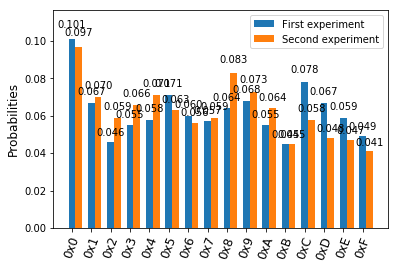

In [7]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer, backends
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = True

# define the number n-Qbits
n = 4
N = 2^n
O = math.sqrt(N)
pi = math.pi

try:
    # Create a Quantum-Register with n-Qbits.
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # initialize n-Qbits
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])

    i = 1
    # avarage of O(sqrt(N)) repititions
    while i < 2:  
        # Create oracle for 0010
        qc.x(qr[0])
        qc.x(qr[2])
        qc.x(qr[3])
        qc.cu1(pi/4, qr[0], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(-pi/4, qr[1], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(pi/4, qr[1], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.x(qr[0])
        qc.x(qr[2])
        qc.x(qr[3])

        # Amplification
        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.h(qr[3])
        qc.x(qr[0])
        qc.x(qr[1])
        qc.x(qr[2])
        qc.x(qr[3])
        ######## cccZ #########
        qc.cu1(pi/4, qr[0], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(-pi/4, qr[1], qr[3])
        qc.cx(qr[0], qr[1])
        qc.cu1(pi/4, qr[1], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        qc.cx(qr[1], qr[2])
        qc.cu1(-pi/4, qr[2], qr[3])
        qc.cx(qr[0], qr[2])
        qc.cu1(pi/4, qr[2], qr[3])
        ####### end cccZ #######
        qc.x(qr[0])
        qc.x(qr[1])
        qc.x(qr[2])
        qc.x(qr[3])
        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.h(qr[3])

        i += 1
        
    # Measure: take state from Qbit to Cbit
    qc.barrier(qr)
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])
    qc.measure(qr[3], cr[3])
    
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 1000, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 1000, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01, counts02], legend=legend)
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)